In [1]:
import pyvista as pv
from Kirchhoffpy import lenspy
from Kirchhoffpy import Feedpy
import matplotlib.pyplot as plt
import matplotlib.tri as tri
import numpy as np
from Kirchhoffpy import coordinate,field_storage
from Kirchhoffpy.Vopy import CO,dotproduct,abs_v
c=299792458
p = pv.Plotter()
srffolder = 'srf/'


10


In [2]:
# 1. define frequnecy and wavelength
freq = 150*10**9
Lambda = c*1000/freq
k = 2*np.pi/Lambda
print(Lambda,k)


1.9986163866666666 3.1437675329275225


In [3]:
# 2. define coordinate systems
eff_focal_length = 569.56 #mm
coord_ref = coordinate.coord_sys([0,0,0],[0,0,0],axes = 'xyz')

coord_L1 = coordinate.coord_sys([0,0,-(803.9719951339465-4.34990822154231*10)],[np.pi,0,0],axes = 'xyz',ref_coord = coord_ref)
coord_L2 = coordinate.coord_sys([0,0,-(227.64396727901004-4.696706712699847*10)],[np.pi,0,0],axes = 'xyz',ref_coord = coord_ref)
coord_L3 = coordinate.coord_sys([0,0,-(71.77590111674095-2.96556*10)],[np.pi,0,0],axes = 'xyz',ref_coord = coord_ref)

coord_feed_offset = coordinate.coord_sys([50,0,0],[np.pi,0,0],axes = 'xyz',ref_coord = coord_ref)
coord_feed_rotation = coordinate.coord_sys([0,0,0],[0,0,0],axes = 'xyz',ref_coord = coord_feed_offset)
coord_feed = coordinate.coord_sys([0,0,0],[0,0,0],axes = 'xyz',ref_coord = coord_feed_rotation)



coord_sky_ref = coordinate.coord_sys([0,0,0],[np.pi,0,0],axes = 'xyz',ref_coord = coord_ref)
coord_sky = coordinate.coord_sys([0,0,0],[0,-50/569.56,0],axes = 'xyz',ref_coord = coord_sky_ref)


In [4]:
# 3. define input Feedhorn
feed= Feedpy.GaussiBeam(-2.1714724,
                        10.1161095,
                        k,
                        coord_feed,
                        polarization = 'x')


26584903304305.848


In [5]:
# 4. Lenses and aperture 
outputfolder = 'output2_noAR/150GHz/x50_offaxis/'
AR_FILE = 'AR_LIB/no_AR.h5'
groupname = 'ideal_AR'
L1 = lenspy.simple_Lens(3.36,
                        4.34991*10,# Thickness
                        44.8*10, # diameter
                        srffolder + 'lens1_f2.rsf', 
                        srffolder + 'lens1_f1.rsf',
                        p,
                        coord_L1,
                        name = 'L1',
                        AR_file = AR_FILE,
                        groupname = groupname,
                        outputfolder = outputfolder)
L2 = lenspy.simple_Lens(3.36,
                        4.69671*10,# Thickness
                        44.8*10, # diameter
                        srffolder + 'lens2_f2.rsf', 
                        srffolder + 'lens2_f1.rsf',
                        p,
                        coord_L2,
                        name = 'L2',
                        AR_file = AR_FILE,
                        groupname = groupname,
                        outputfolder = outputfolder)

L3 = lenspy.simple_Lens(3.36,
                        2.96556*10,# Thickness
                        44.8*10, # diameter
                        srffolder + 'lens3_f2.rsf', 
                        srffolder + 'lens3_f1.rsf',
                        p,
                        coord_L3,
                        name = 'L3',
                        AR_file = AR_FILE,
                        groupname = groupname,
                        outputfolder = outputfolder)
#L2 = lenspy.simple_Lens(2,46.9671 ,400, srffolder + 'lens2_f1.rsf', srffolder + 'lens2_f2.rsf',p,[0,0,-227.64396727901004],name = 'L2')
#L3 = lenspy.simple_Lens(2,29.6556 ,400, srffolder + 'lens3_f1.rsf', srffolder + 'lens3_f2.rsf',p,[0,0,-71.77590111674095],name = 'L3')


In [6]:
# 5. fiedl storage
center_grd = field_storage.Spherical_grd(coord_sky,
                                         0,
                                         0,
                                         20,
                                         20,
                                         501,501,
                                         Type = 'ELoverAz', 
                                         far_near = 'far',
                                         distance = 50000)


In [7]:
N1 =[760,1880]
N2 = [480,2160]
L3.PO_analysis(#[400,1,400,1],
               [1,N1[0],N1[1],1],
               [1,N2[0],N2[1],1],
               #[5,N2[0],N2[1],1],
            feed,k,
            sampling_type_f1='polar',
            phi_type_f1 = 'less',
            sampling_type_f2='polar',
            phi_type_f2 = 'less',
            po_name = '_po_cur_0mm.h5',
            Method ='POPO')


Gain of the Guassian feedhonr!
-6.633057382438071 dB
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
check the sin(theta_i)
##############
check energy conservation!
check the poynting vector
0.0032956615113356558 2.61621945617114e-16
output poynting:
0.002326872740259088
tiemusage: 0.11112713813781738
Batch size: 18
cuda:0 cuda:0 cuda:0
True True True


100%|██████████| 36775/36775 [19:10<00:00, 31.97it/s]


1151.917109489441
check the sin(theta_i)
(array([ 83905,  83906,  83907, ..., 661948, 661949, 661950]),)
**************


/home/xren/Documents/Lens_PO/PO_test/Kirchhoffpy/LensPO.py:348: ComplexWarning: Casting complex values to real discards the imaginary part
  r_p[NN_t] = 1.0 * np.exp(1j*np.pi)
/home/xren/Documents/Lens_PO/PO_test/Kirchhoffpy/LensPO.py:349: ComplexWarning: Casting complex values to real discards the imaginary part
  r_s[NN_t] = 1.0 * np.exp(1j*np.pi)


##############
check energy conservation!
check the poynting vector
0.001699189126729368 4.431223157004353e-18
output poynting:
0.0012121720565541145


In [8]:
N1 =[740,2320]
N2 = [195,390]
L2.PO_analysis(#[400,1,400,1],
               [1,N1[0],N1[1],1],
               [1,N2[0],N2[1],1],
               #[5,N2[0],N2[1],1],
            L3,k,
            sampling_type_f1='polar',
            phi_type_f1 = 'less',
            sampling_type_f2='polar',
            phi_type_f2 = 'less',
            po_name = '_po_cur_0mm.h5',
            Method ='POPO')


output2_noAR/150GHz/x50_offaxis/L3_po_cur_0mm.h5
Here
tiemusage: 0.08200788497924805
Batch size: 26
cuda:0 cuda:0 cuda:0
True True True


100%|██████████| 42146/42146 [22:03<00:00, 31.85it/s]


[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
check the sin(theta_i)
##############
check energy conservation!
check the poynting vector
0.00012268551120031416 1.1799304222158822e-11
output poynting:
8.67792154560032e-05
tiemusage: 0.12533307075500488
Batch size: 15
cuda:0 cuda:0 cuda:0
True True True


100%|██████████| 3276/3276 [01:35<00:00, 34.48it/s]


96.39393019676208
check the sin(theta_i)
(array([42571, 42903, 42957, 42958, 42960, 42963, 43285, 43288, 43290,
       43291, 43342, 43344, 43346, 43347, 43349, 43350, 43353, 43374,
       43377, 43645, 43648, 43669, 43672, 43673, 43675, 43676, 43678,
       43680, 43729, 43731, 43732, 43733, 43734, 43736, 43737, 43739,
       43740, 43761, 43762, 43786, 43787, 44010, 44011, 44035, 44036,
       44057, 44058, 44060, 44061, 44063, 44064, 44065, 44066, 44068,
       44115, 44117, 44119, 44120, 44121, 44122, 44124, 44125, 44127,
       44128, 44149, 44152, 44173, 44174, 44175, 44398, 44399, 44400,
       44421, 44424, 44445, 44446, 44448, 44449, 44451, 44452, 44453,
       44454, 44456, 44458, 44501, 44503, 44504, 44505, 44506, 44507,
       44509, 44510, 44511, 44512, 44513, 44515, 44516, 44529, 44534,
       44536, 44537, 44539, 44540, 44545, 44555, 44560, 44561, 44562,
       44787, 44788, 44789, 44794, 44804, 44809, 44810, 44812, 44813,
       44815, 44820, 44833, 44834, 44836, 44837,

In [9]:
N1 =[680,2320]
N2 = [600,200]
L1.PO_analysis(#[400,1,400,1],
               [1,N1[0],N1[1],1],
               [1,N2[0],N2[1],1],
               #[5,N2[0],N2[1],1],
            L2,k,
            sampling_type_f1='polar',
            phi_type_f1 = 'less',
            sampling_type_f2='polar',
            phi_type_f2 = 'less',
            po_name = '_po_cur_0mm.h5',
            Method ='POPO')


output2_noAR/150GHz/x50_offaxis/L2_po_cur_0mm.h5
Here
tiemusage: 0.003954887390136719
Batch size: 353
cuda:0 cuda:0 cuda:0
True True True


100%|██████████| 2852/2852 [01:19<00:00, 35.89it/s]


[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
check the sin(theta_i)
##############
check energy conservation!
check the poynting vector
5.333963990979681e-06 3.209230329382835e-07
output poynting:
3.7656235410121987e-06
tiemusage: 0.11562609672546387
Batch size: 17
cuda:0 cuda:0 cuda:0
True True True


100%|██████████| 4622/4622 [02:19<00:00, 33.08it/s]


141.14953589439392
check the sin(theta_i)
(array([], dtype=int64),)
**************
##############
check energy conservation!
check the poynting vector
3.561966205451804e-06 2.031392789192912e-07
output poynting:
2.5371494737460467e-06


In [10]:
center_grd.grid.x = center_grd.grid.x.ravel()
center_grd.grid.y = center_grd.grid.y.ravel()
center_grd.grid.z = center_grd.grid.z.ravel()
print(center_grd.grid.z.size)


251001


In [11]:
#L1.surf_cur_file = 'output/L1_po_cur_0mm_x.h5'

L1.source(center_grd,
          k,
          far_near = 'far')


output2_noAR/150GHz/x50_offaxis/L1_po_cur_0mm.h5
[[ 9.96149190e-01 -5.13321994e-34  8.76743510e-02]
 [ 0.00000000e+00  1.00000000e+00  0.00000000e+00]
 [-8.76743510e-02 -1.05745386e-32  9.96149190e-01]]
*(**)
Batch size: 738


100%|██████████| 340/340 [00:12<00:00, 27.12it/s]


In [12]:
r, theta, phi = center_grd.coord_sys._toSpherical(center_grd.grid.x,center_grd.grid.y,center_grd.grid.z)
co,cx,crho = CO(theta,phi)
E_co = dotproduct(center_grd.E,co)
E_cx = dotproduct(center_grd.E,cx)


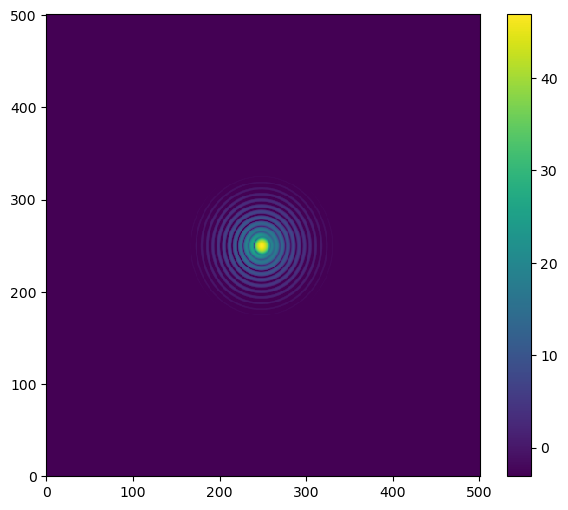

In [13]:
fig = plt.figure(figsize = (7,6))
vmax= np.log10(np.abs(E_co.reshape(501,-1)).max())*20
plt.pcolor(np.log10(np.abs(E_co.reshape(501,-1)))*20,vmax = vmax, vmin = vmax-50)
plt.colorbar()


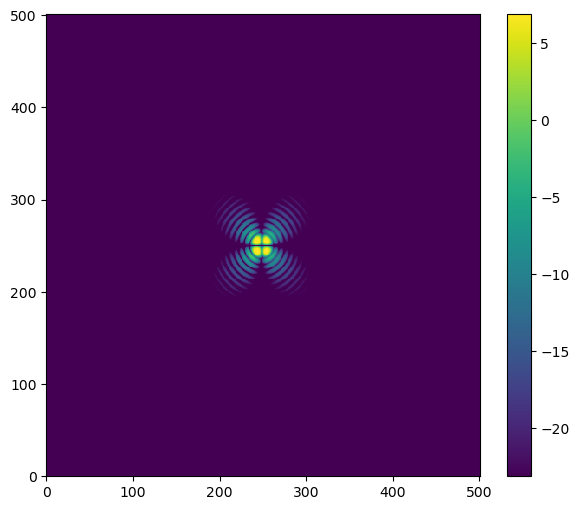

In [14]:
fig = plt.figure(figsize = (7,6))
plt.pcolor(np.log10(np.abs(E_cx.reshape(501,-1)))*20,vmax = vmax-40, vmin = vmax-70)
plt.colorbar()


In [15]:
import h5py as h5
def readh5(fname):
    name = fname.split('.h5')
    with h5.File(name[0]+'.h5','r') as f:
        co = f['co-polar'][:,:]
        cx = f['cx-polar'][:,:]
        Az = f['Az'][:]
        El = f['El'][:]
    return Az, El, co, cx


In [16]:
Az, El, grasp_co,grasp_cx = readh5('../Data/output2/150GHz/150GHz_test/_H5/_x50_y0GHz.h5')


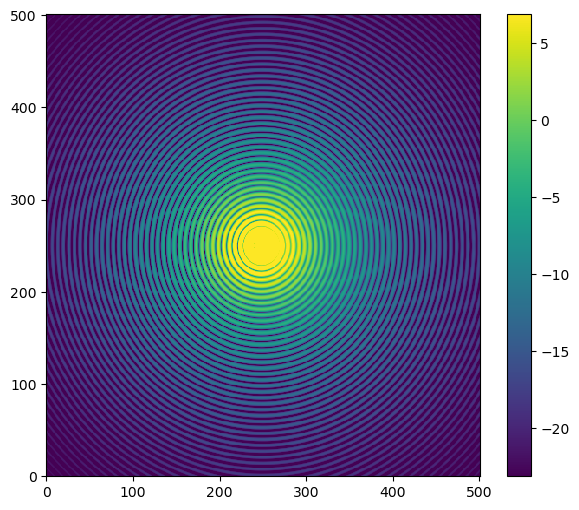

In [17]:
fig = plt.figure(figsize = (7,6))
plt.pcolor(np.log10(np.abs(grasp_co.reshape(501,-1)))*20,vmax = vmax-40, vmin = vmax-70)
plt.colorbar()


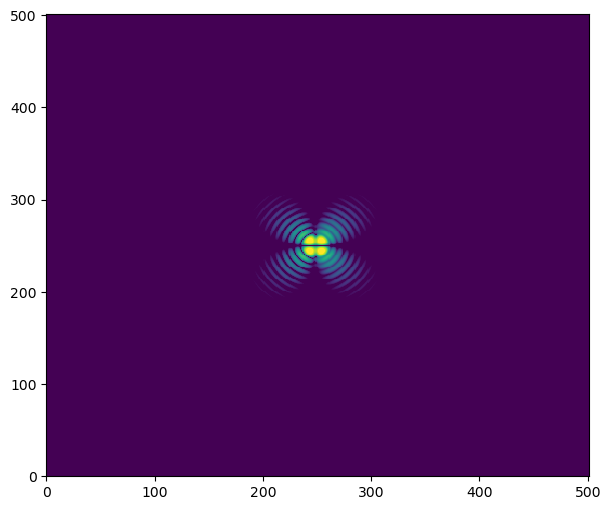

In [18]:
fig = plt.figure(figsize = (7,6))
plt.pcolor(np.log10(np.abs(grasp_cx.reshape(501,-1)))*20,vmax = vmax-40, vmin = vmax-70)


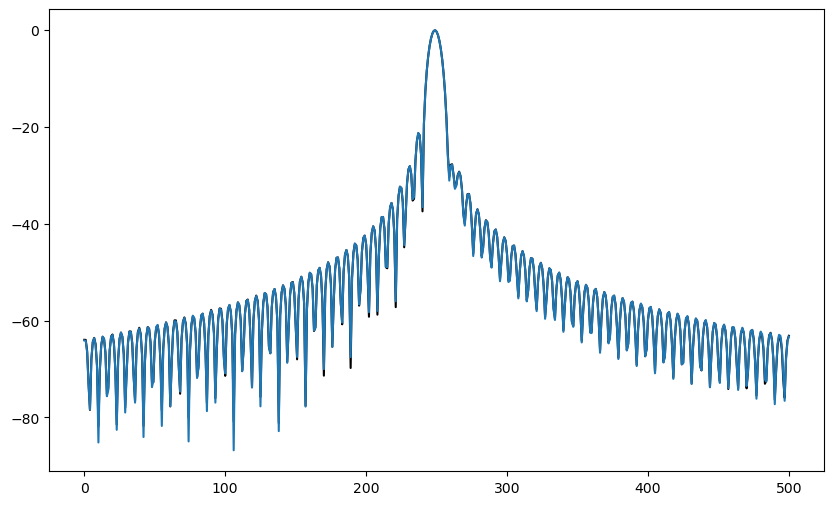

In [19]:
fig  =  plt.figure(figsize= (10,6))
plt.plot(np.log10(np.abs(grasp_co.reshape(501,-1)[250,:])/np.abs(grasp_co.reshape(501,-1)[250,:]).max())*20,'k-')
plt.plot(np.log10(np.abs(E_co.reshape(501,-1)[250,:])/np.abs(E_co.reshape(501,-1)[250,:]).max())*20,'-')


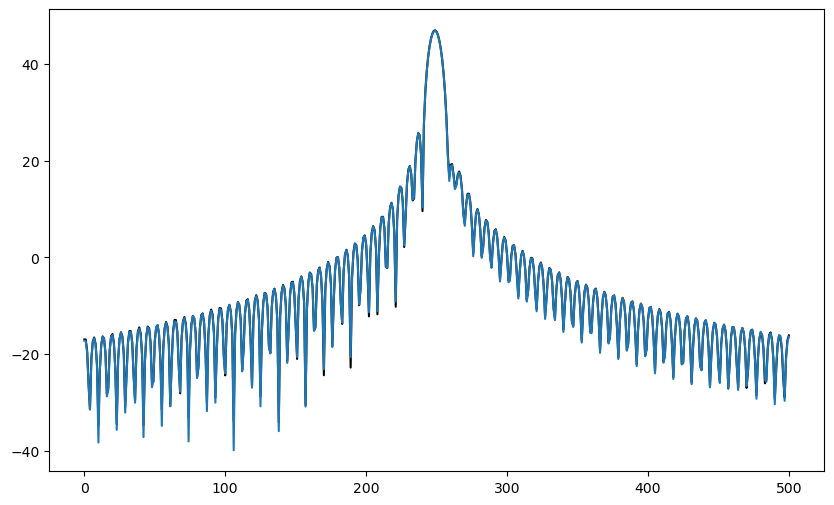

In [20]:
fig  =  plt.figure(figsize= (10,6))
plt.plot(np.log10(np.abs(grasp_co.reshape(501,-1)[250,:]))*20,'k-')
plt.plot(np.log10(np.abs(E_co.reshape(501,-1)[250,:])**2)*10,'-')


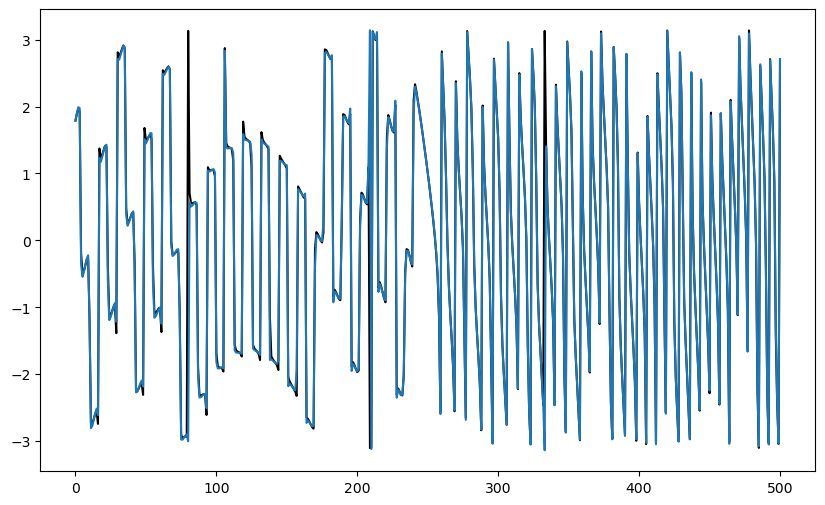

In [21]:
fig  =  plt.figure(figsize= (10,6))
plt.plot(np.angle(grasp_co.reshape(501,-1)[250,:]/np.abs(grasp_co.reshape(501,-1)[250,:]).max()),'k-')
plt.plot(np.angle(E_co.reshape(501,-1)[250,:]/np.abs(E_co.reshape(501,-1)[250,:]).max()),'-')


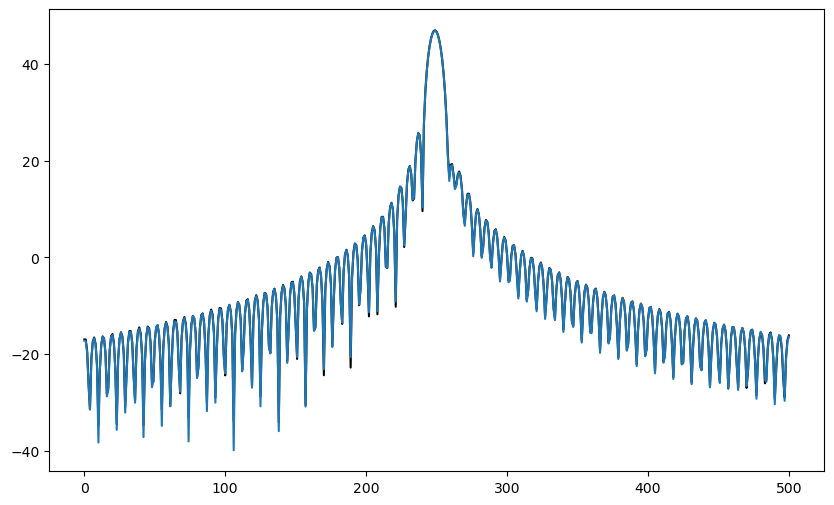

In [22]:
fig  =  plt.figure(figsize= (10,6))
plt.plot(np.log10(np.abs(grasp_co.reshape(501,-1)[250,:]))*20,'k-')
plt.plot(np.log10(np.abs(E_co.reshape(501,-1)[250,:])**2)*10,'-')


In [23]:
G_co = grasp_co.reshape(501,-1).T/grasp_co.reshape(501,-1)[250,250]
H_co = E_co.reshape(501,-1).T/E_co.reshape(501,-1)[250,250]
err = H_co-G_co


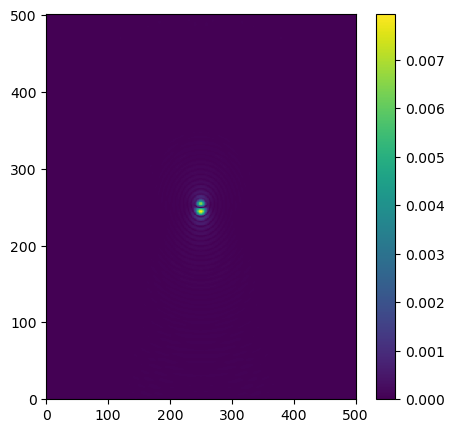

In [24]:
fig = plt.figure(figsize=(5,5))
plt.pcolor(np.abs(err))
plt.colorbar()


In [25]:
G_co = grasp_co.reshape(501,-1)/grasp_co.reshape(501,-1)[250,250]
H_co = E_co.reshape(501,-1)/E_co.reshape(501,-1)[250,250]
err = G_co-G_co.T
err2 = H_co-H_co.T


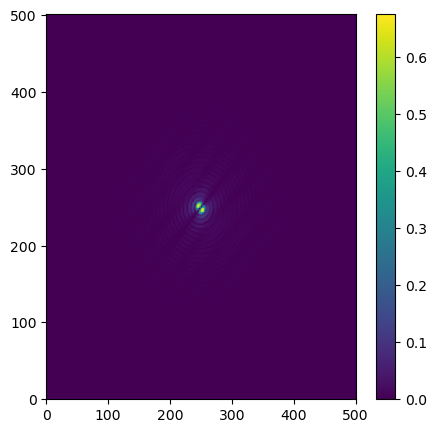

In [26]:
fig = plt.figure(figsize=(5,5))
plt.pcolor(np.abs(err))
plt.colorbar()


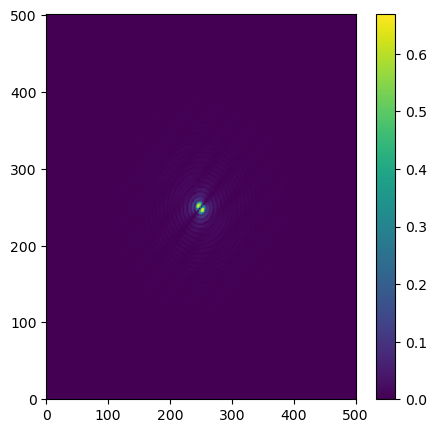

In [27]:
fig = plt.figure(figsize=(5,5))
plt.pcolor(np.abs(err2))
plt.colorbar()


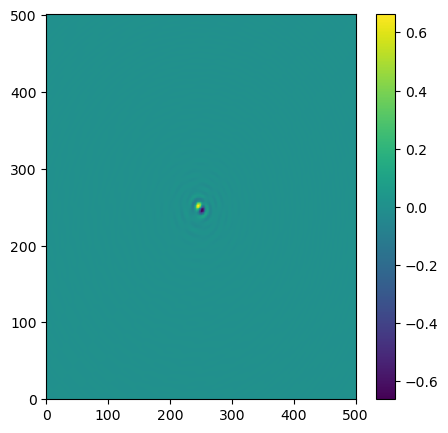

In [28]:
fig = plt.figure(figsize=(5,5))
plt.pcolor(err.imag)
plt.colorbar()


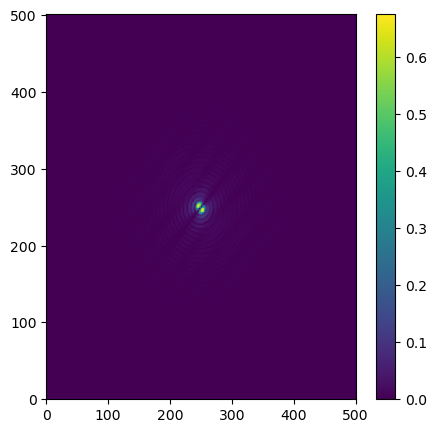

In [29]:
fig = plt.figure(figsize=(5,5))
plt.pcolor(np.abs(err))
plt.colorbar()


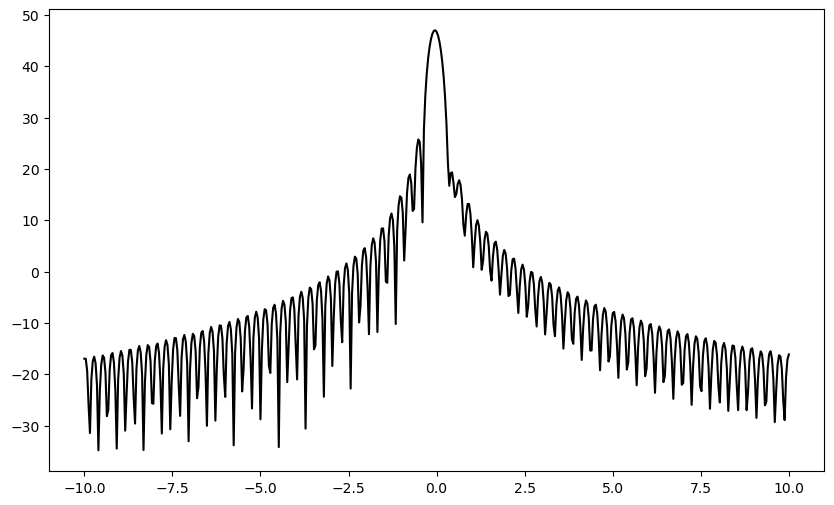

In [30]:
fig  =  plt.figure(figsize= (10,6))
plt.plot(Az,np.log10(np.abs(grasp_co.reshape(501,-1)[250,:]))*20,'k-')


(-50.0, 10.0)

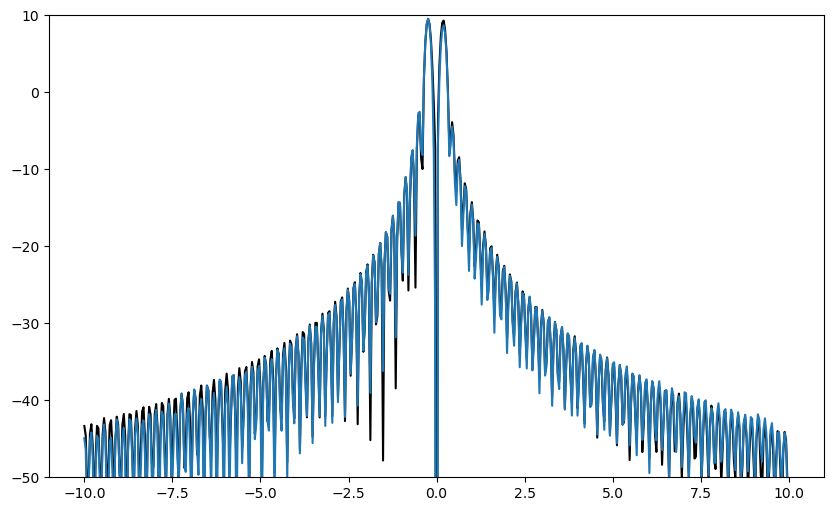

In [31]:
fig  =  plt.figure(figsize= (10,6))
plt.plot(Az,np.log10(np.abs(np.diagonal(grasp_cx.reshape(501,-1))))*20,'k-')
plt.plot(Az,np.log10(np.abs(np.diagonal(center_grd.E.y.reshape(501,-1))))*20,'-')
plt.ylim([-50,10])
#plt.xlim(-1,1)


(-1.0, 1.0)

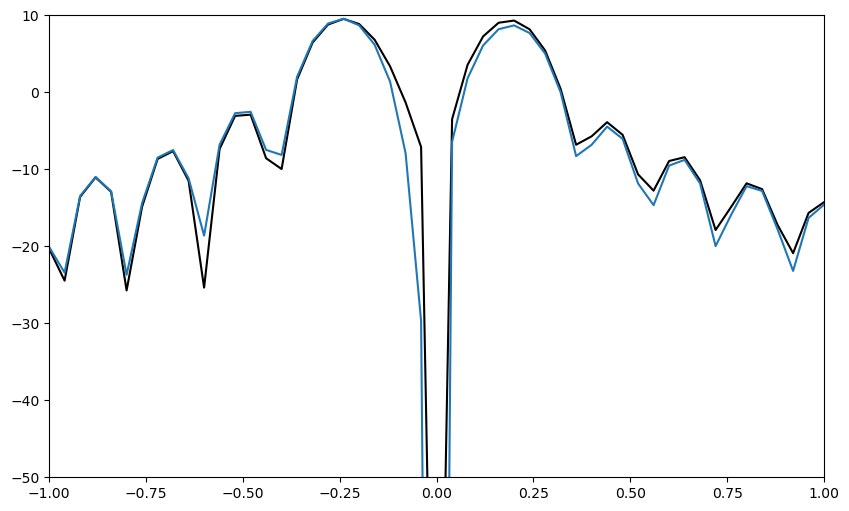

In [ ]:
fig  =  plt.figure(figsize= (10,6))
plt.plot(Az,np.log10(np.abs(np.diagonal(grasp_cx.reshape(501,-1))))*20,'k-')
plt.plot(Az,np.log10(np.abs(np.diagonal(center_grd.E.y.reshape(501,-1))))*20,'-')
plt.ylim([-50,10])
plt.xlim(-1,1)


In [32]:
L_lensFp_3   = 7.177590111674096
L_lens3_2    = 15.586806616226909
L_lens2_1    = 57.632802785493645
L_lens1_Lyot = 1.162050628144469
L_Ly_vw      = 22.7114

L_lens1_ref = L_lensFp_3 + L_lens3_2 + L_lens2_1
L_lens2_ref = L_lensFp_3 + L_lens3_2
L_lens3_ref = L_lensFp_3 
L_Ly_ref = L_lens1_ref + L_lens1_Lyot
L_vw_ref = L_Ly_ref + L_Ly_vw


In [33]:
print(L_lens1_ref*10)
print(L_lens2_ref*10)
print(L_lens3_ref*10)


803.9719951339465
227.64396727901004
71.77590111674095


In [34]:
Az.size


501